# Setup
These steps are needed to setup your workspace and to validate the configuration.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path_to_directory = "/content/gdrive/MyDrive/LFN Project"
data_directory = "/data/"

In [ ]:
import os
networks_names = [x[0:-6] for x in os.listdir(path_to_directory + data_directory)]
print(networks_names)

['bn-fly-drosophila_medulla_1', 'bn-macaque-rhesus_brain_1', 'bn-mouse_brain_1', 'bn-cat-mixed-species_brain_1', 'bn-human-BNU_1_0025871_session_1-bg', 'bn-human-BNU_1_0025890_session_1']


Here you must get the names of the network files (.edges) that are collected inside the relative path "your_directory/data".

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda --version
!conda install 'scipy>=1.8'

✨🍰✨ Everything looks OK!
conda 22.11.1
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.



#Learning from Networks Project 2022/23: CAT, FLY, MACAQUE, MOUSE BRAINS
*Authors:* 
*   *Guglielmin Niccolò* 2052422
*   *Savio Andrea* 2052420
*   *Zaccarin Angelo* 2052414

**Brain graph networks comparison between different species: CAT, FLY, MACAQUE, MOUSE BRAINS**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.special

In [ ]:
#Define function for drawing with node colors depending on a given centrality measure
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [ ]:
#Define function to draw in a simple way a network
def draw_simple_network(G):
    nx.draw(G, with_labels=True)
    plt.show()

In [ ]:
#Define function to compute Global Clustering Coefficient given a graph G
def global_clustering_coefficient(G):
    num_t = 0
    
    for u in list(G.nodes):
        for v in G.neighbors(u):
            for z in G.neighbors(u):
                if v != z and G.has_edge(v, z):
                    num_t = num_t + 1;

    return num_t/(6 * scipy.special.binom(G.number_of_nodes(), 3))

In [ ]:
print("The networks of the brains of the cat, mouse, fly and macaque are going to be analyzed.")

The networks of the brains of the cat, mouse, fly and macaque are going to be analyzed.


In [ ]:
data_directory = "/data/"
network_name = ["bn-cat-mixed-species_brain_1.edges","bn-fly-drosophila_medulla_1.edges","bn-macaque-rhesus_brain_1.edges","bn-mouse_brain_1.edges","bn-human-BNU_1_0025890_session_1.edges"]
#Data dictionary to save brains' networks
cat_brain = {}
mouse_brain = {}
fly_brain = {}
macaque_brain = {}

bn-cat-mixed-species_brain_1.edges


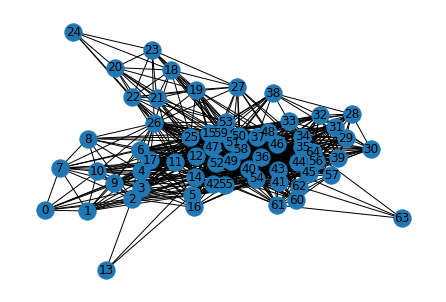

bn-fly-drosophila_medulla_1.edges


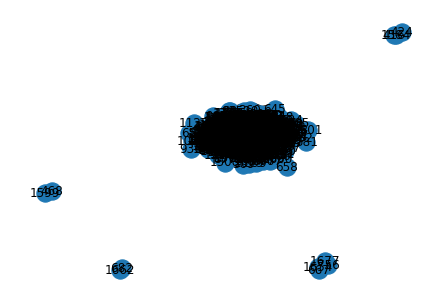

bn-macaque-rhesus_brain_1.edges


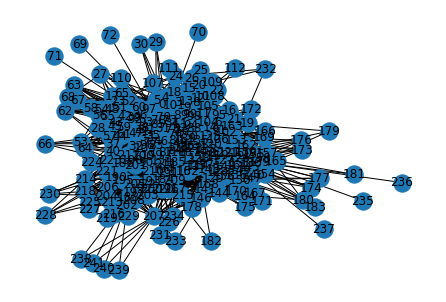

bn-mouse_brain_1.edges


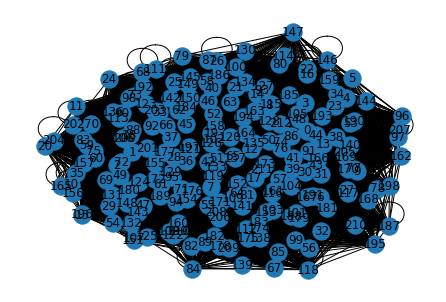

In [ ]:
path_to_network = [None]*4
G = [None]*4
for i in range(4):  
  path_to_network[i] = path_to_directory + data_directory + network_name[i]
  G[i] = nx.read_edgelist(path_to_network[i])
  print(network_name[i])
  draw_simple_network(G[i])

**Computation of Centralities**

We are going to work on centralities indexes:
* Degree centrality;
* Closeness centraliy;
* Betweenness centrality.

Since the above are all indexes at node level and we are interested in indexes at graph level, at the end we will compute the global centralities by calculating the corresponding mean. If feasible, we
will try to compute the exact centralities, otherwise the approximate ones will be computed.

bn-cat-mixed-species_brain_1.edges


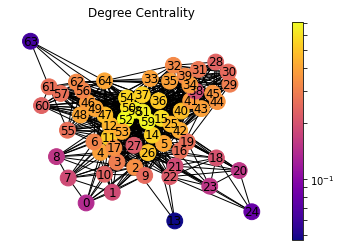

bn-fly-drosophila_medulla_1.edges


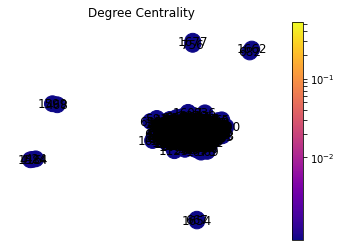

bn-macaque-rhesus_brain_1.edges


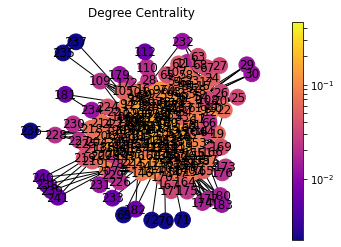

bn-mouse_brain_1.edges


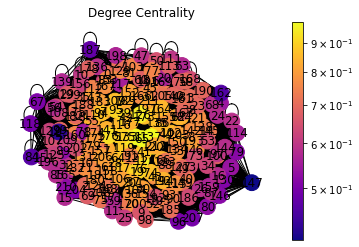

In [ ]:
for i in range(4):
  print(network_name[i])
  draw(G[i], nx.spring_layout(G[i]), nx.degree_centrality(G[i]), 'Degree Centrality')

In [ ]:
cat_brain["average_degree_centrality"] = sum(x for x in nx.degree_centrality(G[0]).values())/G[0].number_of_nodes()
fly_brain["average_degree_centrality"] = sum(x for x in nx.degree_centrality(G[1]).values())/G[1].number_of_nodes()
macaque_brain["average_degree_centrality"] = sum(x for x in nx.degree_centrality(G[2]).values())/G[2].number_of_nodes()
mouse_brain["average_degree_centrality"] = sum(x for x in nx.degree_centrality(G[3]).values())/G[3].number_of_nodes()

bn-cat-mixed-species_brain_1.edges


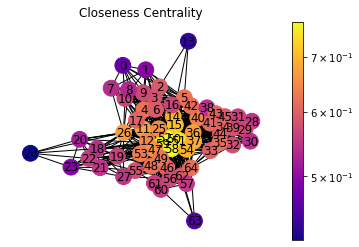

bn-fly-drosophila_medulla_1.edges


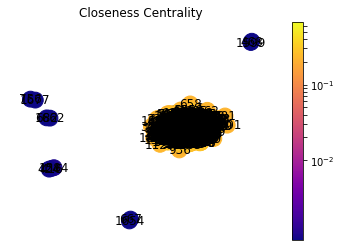

bn-macaque-rhesus_brain_1.edges


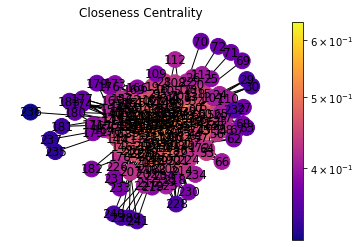

bn-mouse_brain_1.edges


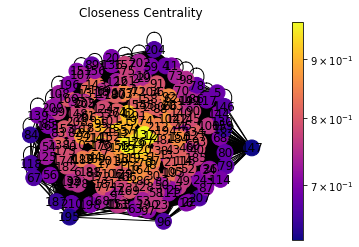

In [ ]:
for i in range(4):
  print(network_name[i])
  draw(G[i], nx.spring_layout(G[i]), nx.closeness_centrality(G[i]), 'Closeness Centrality')

In [ ]:
cat_brain["average_closeness_centrality"] = sum(x for x in nx.closeness_centrality(G[0]).values())/G[0].number_of_nodes()
fly_brain["average_closeness_centrality"] = sum(x for x in nx.closeness_centrality(G[1]).values())/G[1].number_of_nodes()
macaque_brain["average_closeness_centrality"] = sum(x for x in nx.closeness_centrality(G[2]).values())/G[2].number_of_nodes()
mouse_brain["average_closeness_centrality"] = sum(x for x in nx.closeness_centrality(G[3]).values())/G[3].number_of_nodes()

bn-cat-mixed-species_brain_1.edges


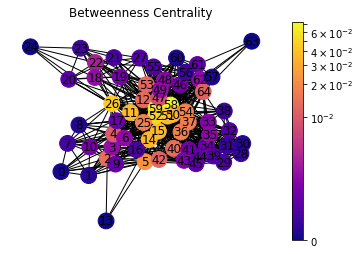

bn-fly-drosophila_medulla_1.edges


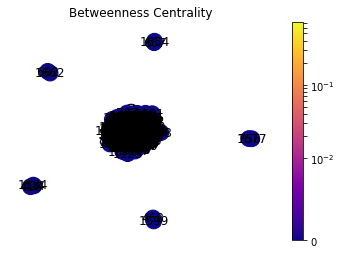

bn-macaque-rhesus_brain_1.edges


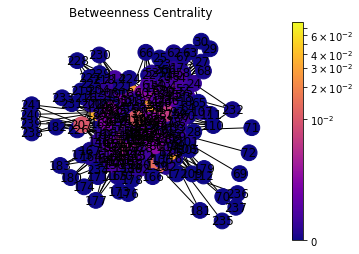

bn-mouse_brain_1.edges


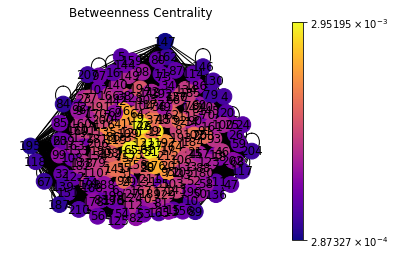

In [ ]:
for i in range(4):
  print(network_name[i])
  draw(G[i], nx.spring_layout(G[i]), nx.betweenness_centrality(G[i]), 'Betweenness Centrality')

In [ ]:
cat_brain["average_betweenness_centrality"] = sum(x for x in nx.betweenness_centrality(G[0]).values())/G[0].number_of_nodes()
fly_brain["average_betweenness_centrality"] = sum(x for x in nx.betweenness_centrality(G[1]).values())/G[1].number_of_nodes()
macaque_brain["average_betweenness_centrality"] = sum(x for x in nx.betweenness_centrality(G[2]).values())/G[2].number_of_nodes()
mouse_brain["average_betweenness_centrality"] = sum(x for x in nx.betweenness_centrality(G[3]).values())/G[3].number_of_nodes()

**Computation of Clustering Coefficient**

We are going to work on Clustering coefficient.

We will compute the global clustering in order to understand how a
graph can be seen from a different point of view.

In [ ]:
cat_brain["global_clustering_coefficient"] = global_clustering_coefficient(G[0])
fly_brain["global_clustering_coefficient"] = global_clustering_coefficient(G[1])
macaque_brain["global_clustering_coefficient"] = global_clustering_coefficient(G[2])
mouse_brain["global_clustering_coefficient"] = global_clustering_coefficient(G[3])

**Computation of Graphlets**

We are going to work on Graphlets.

We will look for particular and frequent subgraphs, motifs that we will
find to be significant for neural graphs in literature.

In [ ]:
#Function induced_subgraph takes in input the graph and the maximum size (number of nodes)
#of the induced_subgraph we want; returns the number of induced subgraphs of each size 
import itertools
def induced_subgraph(G,size):
  counter = [0]*size
  target = nx.complete_graph(size)
  for sub_nodes in itertools.combinations(G.nodes(),len(target.nodes())):
      subg = G.subgraph(sub_nodes)
      if nx.is_connected(subg):
          #print(subg.edges()) 
          #print(len(subg.edges())) 
          if len(subg.edges()) <= size:
            counter[len(subg.edges())-1] =  counter[len(subg.edges())-1] + 1
          else: continue  
  #print(counter) 
  return counter[size - 1]

In [ ]:
"""
We decided to comment the use of induced_subgraph function since
this function takes too much time to compute what needed, 
because of its time complexity.

cat_brain["triangles"] = induced_subgraph(G[0],3)
fly_brain["triangles"] = induced_subgraph(G[1],3)
macaque_brain["triangles"] = induced_subgraph(G[2],3)
mouse_brain["triangles"] = induced_subgraph(G[3],3)
"""

'\nWe decided to comment the use of induced_subgraph function since\nthis function takes too much time to compute what needed, \nbecause of its time complexity.\n\ncat_brain["triangles"] = induced_subgraph(G[0],3)\nfly_brain["triangles"] = induced_subgraph(G[1],3)\nmacaque_brain["triangles"] = induced_subgraph(G[2],3)\nmouse_brain["triangles"] = induced_subgraph(G[3],3)\n'

**Computation of Cliques**

We are going to work on Cliques.

We will compute some indexes of them (e.g. maximal, number of cliques), if feasible.

In [ ]:
"""
We decided to comment the use of enumerate_all_cliques function since
this function takes too much time to compute what needed, 
because of its time complexity.

#Returns all cliques in an undirected graph
#This function returns an iterator over cliques, each of which is a list of nodes.
#The iteration is ordered by cardinality of the cliques: first all cliques of size one, then all cliques of size two, etc.
for i in range(4):
  print(network_name[i])
  len(list(nx.enumerate_all_cliques(G[i])))
"""

'\nWe decided to comment the use of enumerate_all_cliques function since\nthis function takes too much time to compute what needed, \nbecause of its time complexity.\n\n#Returns all cliques in an undirected graph\n#This function returns an iterator over cliques, each of which is a list of nodes.\n#The iteration is ordered by cardinality of the cliques: first all cliques of size one, then all cliques of size two, etc.\nfor i in range(4):\n  print(network_name[i])\n  len(list(nx.enumerate_all_cliques(G[i])))\n'

In [ ]:
"""
We decided to comment the use of find_cliques function since
this function takes too much time to compute what needed, 
because of its time complexity.

for i in range(4):
    print(network_name[i])
    len(list(nx.find_cliques(G[i])))
"""

'\nWe decided to comment the use of find_cliques function since\nthis function takes too much time to compute what needed, \nbecause of its time complexity.\n\nfor i in range(4):\n    print(network_name[i])\n    len(list(nx.find_cliques(G[i])))\n'

In [ ]:
"""
We decided to comment the use of graph_clique_number function since
this function takes too much time to compute what needed, 
because of its time complexity.

#Returns the clique number of the graph
#The clique number of a graph is the size of the largest clique in the graph.
for i in range(4):
    print(network_name[i])
    nx.graph_clique_number(G[i], cliques=None)
"""

'\nWe decided to comment the use of graph_clique_number function since\nthis function takes too much time to compute what needed, \nbecause of its time complexity.\n\n#Returns the clique number of the graph\n#The clique number of a graph is the size of the largest clique in the graph.\nfor i in range(4):\n    print(network_name[i])\n    nx.graph_clique_number(G[i], cliques=None)\n'

In [ ]:
"""
We decided to comment the use of graph_number_of_cliques function since
this function takes too much time to compute what needed, 
because of its time complexity.

#Returns the number of maximal cliques in the graph
for i in range(4):
    print(network_name[i])
    nx.graph_number_of_cliques(G[i])
"""

'\nWe decided to comment the use of graph_number_of_cliques function since\nthis function takes too much time to compute what needed, \nbecause of its time complexity.\n\n#Returns the number of maximal cliques in the graph\nfor i in range(4):\n    print(network_name[i])\n    nx.graph_number_of_cliques(G[i])\n'

**Z-scores**

Generate 10 random graphs and compute interested value of all of them then compute zscore for it.

In [ ]:
#This part of the code may take a while (about 5 minutes)

number_of_random_graphs = 10

random_average_degree_centrality = np.array([])
random_average_closeness_centrality = np.array([])
random_average_betweenness_centrality = np.array([])
random_global_clustering_coefficient = np.array([])

for network_index in range(4):
  n = G[network_index].number_of_nodes()
  m = G[network_index].number_of_edges()
  for i in range(number_of_random_graphs):
    randomg = nx.gnm_random_graph(n, m,i)
    random_average_degree_centrality = np.append(random_average_degree_centrality,sum(x for x in nx.degree_centrality(randomg).values())/randomg.number_of_nodes())
    random_average_closeness_centrality = np.append(random_average_closeness_centrality,sum(x for x in nx.closeness_centrality(randomg).values())/randomg.number_of_nodes())
    random_average_betweenness_centrality = np.append(random_average_betweenness_centrality,sum(x for x in nx.betweenness_centrality(randomg).values())/randomg.number_of_nodes())
    random_global_clustering_coefficient = np.append(random_global_clustering_coefficient, global_clustering_coefficient(randomg))


  # To visualize values for each random graph:
  # print(random_average_degree_centrality, random_average_closeness_centrality, random_average_betweenness_centrality, random_global_clustering_coefficient)

  network_dict = {}

  if(network_index == 0):
    network_dict = cat_brain
  elif(network_index == 1):
    network_dict = fly_brain
  elif(network_index == 2):
    network_dict = macaque_brain
  elif(network_index == 3):
    network_dict = mouse_brain
  
  z_average_degree_centrality = (network_dict["average_degree_centrality"]-np.mean(random_average_degree_centrality))/np.std(random_average_degree_centrality)
  z_average_closeness_centrality = (network_dict["average_closeness_centrality"]-np.mean(random_average_closeness_centrality))/np.std(random_average_closeness_centrality)
  z_average_betweenness_centrality = (network_dict["average_betweenness_centrality"]-np.mean(random_average_betweenness_centrality))/np.std(random_average_betweenness_centrality)
  z_global_clustering_coefficient = (network_dict["global_clustering_coefficient"]-np.mean(random_global_clustering_coefficient))/np.std(random_global_clustering_coefficient)

  print("The z scores for the ", network_name[network_index][0:-6], "network are:", z_average_degree_centrality, z_average_closeness_centrality, z_average_betweenness_centrality, z_global_clustering_coefficient)
  

<ipython-input-25-6a1e6166054f>:35: RuntimeWarning: invalid value encountered in double_scalars
  z_average_degree_centrality = (network_dict["average_degree_centrality"]-np.mean(random_average_degree_centrality))/np.std(random_average_degree_centrality)


The z scores for the  bn-cat-mixed-species_brain_1 network are: nan -78.12232730291369 486893418529103.44 78.8262665994595
The z scores for the  bn-fly-drosophila_medulla_1 network are: -0.9999999999999997 -0.610145895608378 -1.0769287250141635 -0.9990258620681751
The z scores for the  bn-macaque-rhesus_brain_1 network are: -0.3379893387723249 -0.07248838837033635 -0.042817926724798776 -0.4623690886086071
The z scores for the  bn-mouse_brain_1 network are: 1.5408913670826252 1.3261115643863899 -0.7928903995521844 1.880278130459325


**Conclusion**

At the end, the dictionaries with data saved for brains' networks are complete.

In [ ]:
print("cat")
print(cat_brain)
print("fly")
print(fly_brain)
print("macaque")
print(macaque_brain)
print("mouse")
print(mouse_brain)

cat
{'average_degree_centrality': 0.35096153846153844, 'average_closeness_centrality': 0.5977123468798444, 'average_betweenness_centrality': 0.011103479853479847, 'global_clustering_coefficient': 0.08271520146520146}
fly
{'average_degree_centrality': 0.005688005097502266, 'average_closeness_centrality': 0.34908316406327655, 'average_betweenness_centrality': 0.0010607090326067673, 'global_clustering_coefficient': 1.864905286532353e-05}
macaque
{'average_degree_centrality': 0.1047289187613591, 'average_closeness_centrality': 0.45854857678666977, 'average_betweenness_centrality': 0.00507284272372918, 'global_clustering_coefficient': 0.005542505401049347}
mouse
{'average_degree_centrality': 0.7193728408184963, 'average_closeness_centrality': 0.7834343667818661, 'average_betweenness_centrality': 0.0013621026885627461, 'global_clustering_coefficient': 0.39697222351666406}


#Learning from Networks Project 2022/23: HUMAN BRAIN
*Authors:* 
*   *Guglielmin Niccolò* 2052422
*   *Savio Andrea* 2052420
*   *Zaccarin Angelo* 2052414

**Brain graph networks comparison between different species: HUMAN BRAIN**

In [ ]:
!pip install -q networkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 25.0 MB/s eta 0:00:00


In [ ]:
import networkit as nk
from statistics import mean
import numpy as np

In [ ]:
#path_to_directory variabile has been already initialized properly at the beginning
#data_directory = "/data/"
network_name = network_name[4]

path_to_network = path_to_directory + data_directory + network_name

In [ ]:
human_brain = {}

In [ ]:
#To read the graph
G = nk.readGraph(path_to_network, nk.Format.EdgeListSpaceZero)
print(G)

NetworKit.Graph(n=1738053, m=15669037)


**Computation of Centralities**

We are going to work on centralities indexes:
* Degree centrality;
* Closeness centraliy;
* Betweenness centrality.

Since the above are all indexes at node level and we are interested in indexes at graph level, at the end we will compute the global centralities by calculating the corresponding mean. Since the large size of the graph, we
will compute the approximate centralities.

Degree Centrality

In [ ]:
deg = nk.centrality.DegreeCentrality(G)
deg.run()
human_brain["average_degree_centrality"] = mean(deg.scores())
print(human_brain["average_degree_centrality"])

18.030562934501997


Closeness Centrality

In [ ]:
ac = nk.centrality.ApproxCloseness(G, 100)
ac.run()
scores = []

for x in ac.scores():
  if ((str(x) != 'nan') and (str(x) != 'inf')):
    scores.append(x)

human_brain["average_closeness_centrality"] = mean(scores)
print(human_brain["average_closeness_centrality"])

8.961411446674954e-08


Betweenness Centrality

In [ ]:
est = nk.centrality.EstimateBetweenness(G, 50, True, False)
est.run()
scores = []

for x in est.scores():
  if ((str(x) != 'nan') and (str(x) != 'inf')):
    scores.append(x)

human_brain["average_betweenness_centrality"] = mean(scores)
print(human_brain["average_betweenness_centrality"])

2.0591534047876936e-08


**Global Clustering Coefficient**

In [ ]:
human_brain["global_clustering_coefficient"] = nk.globals.clustering(G)

**Z-scores**

Generate 10 random graphs and compute interested value of all of them then compute zscore for it.

In [ ]:
number_of_random_graphs = 10

random_average_degree_centrality = np.array([])
random_average_closeness_centrality = np.array([])
random_average_betweenness_centrality = np.array([])
random_global_clustering_coefficient = np.array([])

n = G.numberOfNodes()
m = G.numberOfEdges()
p = 2*m/(n*(n-1)) #get the correct number of edges in expectation
for i in range(number_of_random_graphs):
  print("Iter :", i)
  erg = nk.generators.ErdosRenyiGenerator(n, p)
  randomg = erg.generate() 
  print(randomg)

  deg = nk.centrality.DegreeCentrality(randomg)
  deg.run()
  random_average_degree_centrality = np.append(random_average_degree_centrality,mean(deg.scores()))

  ac = nk.centrality.ApproxCloseness(randomg, 100)
  ac.run()
  scores = []
  for x in ac.scores():
    if ((str(x) != 'nan') and (str(x) != 'inf')):
      scores.append(x)
  random_average_closeness_centrality = np.append(random_average_closeness_centrality,mean(scores))

  est =  nk.centrality.EstimateBetweenness(randomg, 50, True, False)
  est.run()
  scores = []
  for x in est.scores():
    if ((str(x) != 'nan') and (str(x) != 'inf')):
      scores.append(x)
  random_average_betweenness_centrality = np.append(random_average_betweenness_centrality,mean(scores))
  
  random_global_clustering_coefficient = np.append(random_global_clustering_coefficient, nk.globals.clustering(randomg))


z_average_degree_centrality = (human_brain["average_degree_centrality"]-np.mean(random_average_degree_centrality))/np.std(random_average_degree_centrality)
z_average_closeness_centrality = (human_brain["average_closeness_centrality"]-np.mean(random_average_closeness_centrality))/np.std(random_average_closeness_centrality)
z_average_betweenness_centrality = (human_brain["average_betweenness_centrality"]-np.mean(random_average_betweenness_centrality))/np.std(random_average_betweenness_centrality)
z_global_clustering_coefficient = (human_brain["global_clustering_coefficient"]-np.mean(random_global_clustering_coefficient))/np.std(random_global_clustering_coefficient)

print(z_average_degree_centrality, z_average_closeness_centrality, z_average_betweenness_centrality, z_global_clustering_coefficient)

Iter : 0
NetworKit.Graph(n=1738053, m=15667563)
Iter : 1
NetworKit.Graph(n=1738053, m=15670555)
Iter : 2
NetworKit.Graph(n=1738053, m=15673944)
Iter : 3
NetworKit.Graph(n=1738053, m=15664104)
Iter : 4
NetworKit.Graph(n=1738053, m=15679221)
Iter : 5
NetworKit.Graph(n=1738053, m=15665420)
Iter : 6
NetworKit.Graph(n=1738053, m=15670892)
Iter : 7
NetworKit.Graph(n=1738053, m=15675199)
Iter : 8
NetworKit.Graph(n=1738053, m=15665885)
Iter : 9
NetworKit.Graph(n=1738053, m=15668984)
-0.24986770521080703 -100.99570262555535 -377.1084126336389 36079.666666666664


**Conclusion**

At the end, the dictionary with data saved for brain's network is complete.

In [ ]:
print("human")
print(human_brain)

human
{'average_degree_centrality': 18.030562934501997, 'average_closeness_centrality': 8.961411446674954e-08, 'average_betweenness_centrality': 2.0591534047876936e-08, 'global_clustering_coefficient': 0.47007730391731084}


#Learning from Networks Project 2022/23: REPRESENTATION OF DATA EXTRACTED FROM THE BRAIN NETWORKS
*Authors:* 
*   *Guglielmin Niccolò* 2052422
*   *Savio Andrea* 2052420
*   *Zaccarin Angelo* 2052414

**Brain graph networks comparison between different species: REPRESENTATION OF DATA EXTRACTED FROM THE BRAIN NETWORKS**

Now we are goint to compare the features extracted for each network using feature vectors. From these vectors we can represent graphs as
points in a R^4 with 4 number of parameters we computed. Therefore, using the fact that two similar networks are close in a R^n space we can conclude their similarity also in functionalities. For this reason, we provide a visual concept of what has been evaluated, that is a 2D representation
of the R^4 space using PCA.

In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 28.9 MB/s eta 0:00:00


In [ ]:
data = [[cat_brain["average_degree_centrality"],cat_brain["average_closeness_centrality"],cat_brain["average_betweenness_centrality"],cat_brain["global_clustering_coefficient"]],
        [fly_brain["average_degree_centrality"],fly_brain["average_closeness_centrality"],fly_brain["average_betweenness_centrality"],fly_brain["global_clustering_coefficient"]],
        [macaque_brain["average_degree_centrality"],macaque_brain["average_closeness_centrality"],macaque_brain["average_betweenness_centrality"],macaque_brain["global_clustering_coefficient"]],
        [mouse_brain["average_degree_centrality"],mouse_brain["average_closeness_centrality"],mouse_brain["average_betweenness_centrality"],mouse_brain["global_clustering_coefficient"]],
        [human_brain["average_degree_centrality"],human_brain["average_closeness_centrality"],human_brain["average_betweenness_centrality"],human_brain["global_clustering_coefficient"]]]

In [ ]:
#print(data.shape)
print(data)

[[0.35096153846153844, 0.5977123468798444, 0.011103479853479847, 0.08271520146520146], [0.005688005097502266, 0.34908316406327655, 0.0010607090326067673, 1.864905286532353e-05], [0.1047289187613591, 0.45854857678666977, 0.00507284272372918, 0.005542505401049347], [0.7193728408184963, 0.7834343667818661, 0.0013621026885627461, 0.39697222351666406], [18.030562934501997, 8.961411446674954e-08, 2.0591534047876936e-08, 0.47007730391731084]]


In [ ]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)
print(data)

[[-0.49184191  0.6089401   1.81426058 -0.5378609 ]
 [-0.5404828  -0.33756816 -0.65338158 -0.94837546]
 [-0.52653028  0.07915652  0.33245295 -0.92095445]
 [-0.43994146  1.31596661 -0.57932515  1.02214467]
 [ 1.99879645 -1.66649507 -0.91400681  1.38504614]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

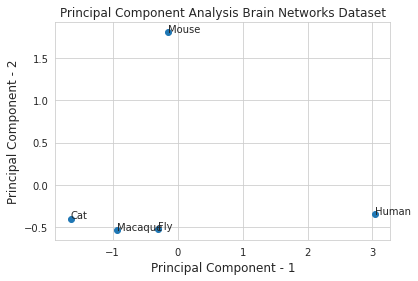

In [ ]:
import matplotlib.pyplot as plt
graphs = ["Cat","Fly","Macaque","Mouse","Human"]
x, y = principalComponents.T
plt.scatter(x, y)
plt.xlabel('Principal Component - 1',fontsize=12)
plt.ylabel('Principal Component - 2',fontsize=12)
plt.title("Principal Component Analysis Brain Networks Dataset",fontsize=12)
for i, txt in enumerate(graphs):
    plt.annotate(txt, (x[i], y[i]))
plt.show()